### 这个单元格给助教，请忽略!

### Score: 100.5

### Comment:
Q1.[11]Good job!

Q2.[11]Good job!

Q3.[16.5+5.5]Good job!

Q4.[5.5+14+4]4.2函数逻辑有误，4.3缺少对图的分析

Q5.[4+24+5]5.1、5.2函数有误


请实现每个 function 内容，确保最终提交的notebook是可以运行的。

每一题除了必须要报告的 输出/图表，可以添加解释（中文即可）。此外可以自定义其他 function / 变量，自由添加单元格，但请确保题目中给出的 function （如第一题的 Print_values）可以正常调用。

In [1]:
# 1
def Print_values(a, b, c):
    # Step 1: If b > c, swap b and c
    if c > b:
        b, c = c, b
    
    # Step 2: If a > b, swap a and b
    if b > a:
        a, b = b, a
    
    # Step 3: If a > c, swap a and c
    if c > a:
        a, c = c, a
    
    # Step 4: Compute and print x + y - 10z
    x, y, z = a, b, c
    result = x + y - 10 * z
    print(result)

# Test the function with a=10, b=5, c=1
Print_values(1, 1, 2)

-7


In [2]:
# 2
import math

def continuous_ceiling(lst):
    def F(x):
        if x == 1:
            return 1
        else:
            return F(math.ceil(x / 3)) + 2 * x
    
    result = []
    for num in lst:
        result.append(F(num))
    
    return result


# 示例测试
lst = [1, 2, 3, 4, 5, 100]
print(continuous_ceiling(lst))

[1, 5, 7, 13, 15, 305]


In [6]:
# 3
def find_number_of_ways(n_dice, target_sum):
    dp = [[0] * (target_sum + 1) for _ in range(n_dice + 1)]
    dp[0][0] = 1

    for i in range(1, n_dice + 1):
        for j in range(i, target_sum + 1):
            for k in range(1, 7):
                dp[i][j] += dp[i-1][j-k]

    return dp[n_dice][target_sum]


def count_ways(target_sums):
    number_of_ways = []

    for target in target_sums:
        number_of_ways.append(find_number_of_ways(10, target))

    return number_of_ways


if __name__ == "__main__":
    target_sums = list(range(10, 61))
    number_of_ways = count_ways(target_sums)

    max_value = max(number_of_ways)
    index = number_of_ways.index(max_value)

    print(f"The maximum number of ways is {max_value} when the sum is {target_sums[index]}")

The maximum number of ways is 4395456 when the sum is 35


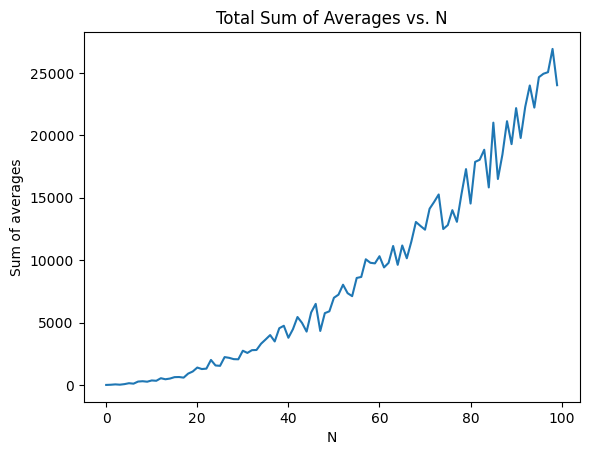

In [7]:
# 4
import numpy as np

def random_integer(N):
    return np.random.randint(0, 11, N).tolist()


def sum_averages(arr):
    total_sum = 0
    # NOTE: 此处循环逻辑有误，重复计算了[:j]的平均值，且没有计算[j:]的平均值 -1
    for i in range(len(arr)):
        for j in range(i+1, len(arr)+1):
            subset = arr[:j]
            total_sum += np.mean(subset)
    return total_sum


def compute_total_sum_averages():
    Total_sum_averages = []
    for N in range(1, 101):
        arr = random_integer(N)
        Total_sum_averages.append(sum_averages(arr))
    return Total_sum_averages


if __name__ == "__main__":
    Total_sum_averages = compute_total_sum_averages()

    import matplotlib.pyplot as plt

    plt.plot(Total_sum_averages)
    plt.xlabel("N")
    plt.ylabel("Sum of averages")
    plt.title("Total Sum of Averages vs. N")
    # NOTE: 缺少对图的分析 -1
    plt.show()

In [41]:
# 5.1
import numpy as np
import random
'''
def create_matrix(N, M):
    # Create a matrix with N rows and M columns
    matrix = np.ones((N, M), dtype=int)
    # Fill the top-left corner cell with 1 (already done by np.ones)
    # Fill the rest of the matrix with 0 or 1 randomly, except the corners
    # NOTE: 这样生成的矩阵边界值恒为1，可以尝试先生成随机数组再将左上角和右下角的值置为1
    for i in range(1, N-1):
        for j in range(1, M-1):
            matrix[i, j] = random.choice([0, 1])
    return matrix
'''
# NOTE: 以下为稍微修改后的函数
def create_matrix(N, M):
    # Create a matrix with N rows and M columns
    matrix = np.ones((N, M), dtype=int)
    # Fill the top-left corner cell with 1 (already done by np.ones)
    # Fill the rest of the matrix with 0 or 1 randomly, except the corners
    for i in range(0, N):
        for j in range(0, M):
            matrix[i, j] = random.choice([0, 1])
    matrix[0, 0] = 1
    matrix[-1, -1] = 1
    return matrix
create_matrix(4, 4)

array([[1, 0, 1, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

In [64]:
# 5.2
def count_paths(matrix):
    # NOTE: 这里应该创建一个新的全零数组并将左上角置为1，然后对新的数组进行后续操作，而非直接对原数组进行操作 -1
    # If the starting cell is blocked, there are no paths
    if matrix[0, 0] == 0:
        return 0
    
    # Initialize the first row and column
    for i in range(1, len(matrix)):
        if matrix[i, 0] == 1:
            matrix[i, 0] = matrix[i-1, 0]
        else:
            matrix[i, 0] = 0
    
    for j in range(1, len(matrix[0])):
        if matrix[0, j] == 1:
            matrix[0, j] = matrix[0, j-1]
        else:
            matrix[0, j] = 0
    
    # Fill in the rest of the matrix
    for i in range(1, len(matrix)):
        for j in range(1, len(matrix[0])):
            if matrix[i, j] == 1:
                matrix[i, j] = matrix[i-1, j] + matrix[i, j-1]
            else:
                matrix[i, j] = 0
    
    # The bottom-right corner will have the total number of paths
    return int(matrix[-1, -1])
print(create_matrix(4, 4))
count_paths(create_matrix(4, 4))

[[1 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [1 1 0 1]]


3

In [62]:
# 5.3
def main():
    N = 10
    M = 8
    num_runs = 1000
    path_counts = []
    
    for _ in range(num_runs):
        matrix = create_matrix(N, M)
        path_count = count_paths(matrix)
        path_counts.append(path_count)
    
    mean_paths = np.mean(path_counts)
    return mean_paths

# Run the main function and print the result
mean_paths = main()
print(f"Mean number of paths over 1000 runs: {mean_paths}")

Mean number of paths over 1000 runs: 0.58
